In [1]:
import numpy as np
import librosa
import librosa.display
import os
from matplotlib import pyplot as plt
import random

Dataset\fujitou_angry\fujitou_angry_001.wav


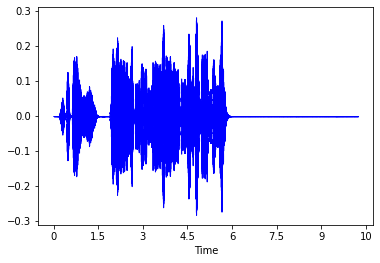

In [2]:
# attempt to load a wave file
wav_data_path = os.path.join("Dataset","fujitou_angry","fujitou_angry_001.wav") 
print(wav_data_path)
x, fs = librosa.load(wav_data_path, sr=44100)

librosa.display.waveshow(x, sr=fs, color='blue')

In [3]:
x.shape

(451584,)

C:\Users\R\AppData\Local\Temp/ipykernel_15700/3999905160.py:2: FutureWarning: Pass y=[ 3.1092113e-06 -5.3964563e-06  8.2538909e-06 ... -4.2521147e-05
  2.9740580e-05 -2.7779224e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


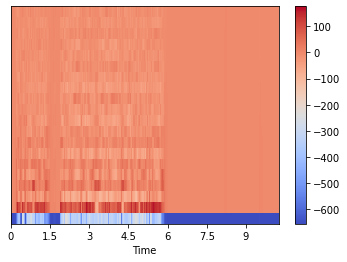

In [4]:
# transfer from wav to mfcc
mfccs = librosa.feature.mfcc(x, sr=fs)
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [5]:
# noticed there are regions before and after the recording without any voice, attempt to remove them
def cut_silence(wavdata, eps=0.01):
    abs_data = np.abs(wavdata)
    threshold = np.max(abs_data) * eps
    #cut data < 0.01 * max y value from the beginning
    start = 0
    while start < len(wavdata) and abs_data[start] < threshold:
        start += 1
    #cut data < 0.01 * max y value from the end
    end = len(wavdata)-1
    while end > 0 and abs_data[end] < threshold:
        end -= 1
    return wavdata[start:end+1]

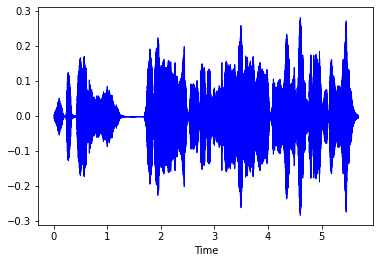

In [6]:
# after cutting, show the wav data
x = cut_silence(x)
librosa.display.waveshow(x, sr=fs, color='blue')

In [7]:
x.shape

(250491,)

C:\Users\R\AppData\Local\Temp/ipykernel_15700/2121211317.py:2: FutureWarning: Pass y=[ 0.00289613  0.00296514  0.00293736 ... -0.00292669 -0.00290606
 -0.00288079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


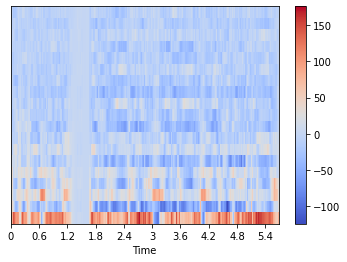

In [8]:
# trasfer to mfcc again
mfccs = librosa.feature.mfcc(x, sr=fs)
# Row 0 of mfcc only conveys a constant offset, which can be discarded when performing classification
mfccs = mfccs[1:]
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [9]:
mfccs

array([[ 95.559525  ,  86.98697   ,  81.04467   , ...,  42.23462   ,
         52.16474   ,  83.32338   ],
       [ 43.412605  ,  36.08561   ,  33.36247   , ...,   4.535635  ,
         12.176806  ,  29.673584  ],
       [ 19.48138   ,  23.376354  ,  24.859716  , ...,  69.69026   ,
         57.215595  ,  29.031998  ],
       ...,
       [ -3.8282428 ,  -5.806698  ,  -5.699748  , ...,  -8.154301  ,
        -12.936133  ,  -6.768589  ],
       [-10.654982  ,  -8.89759   , -10.843164  , ...,   0.21068054,
         -2.3907657 ,  -1.934056  ],
       [-15.026709  , -11.817776  , -14.014464  , ...,  -7.651658  ,
         -7.5549808 ,  -3.4352021 ]], dtype=float32)

Following blocks are adapted from a website: https://qiita.com/atily17/items/ca9c594ec678f241e8bf

In [10]:
# Transfer from wav to mfcc files and save as npy files all together
DATASET_DIR="Dataset"

wavdatas = []

dirlist = os.listdir(DATASET_DIR)
for d in dirlist:
    d = os.path.join(DATASET_DIR, d)
    datalist = os.listdir(d)
    y = [d[d.find("\\")+1:d.find("_")], d[d.find("_") + 1:]] # from file name to determine the correct label
    datalist = [[os.path.join(d,x), y] for x in datalist]
    wavdatas.extend(datalist)

In [11]:
MFCCs_DATA = "MFCCsData2" # store uncutted audio in new folder

dirlist = os.listdir(DATASET_DIR)
for d in dirlist:
    os.makedirs(os.path.join(MFCCs_DATA, d), exist_ok=True)

In [12]:
def get_mfcc(datadir):
    x, fs = librosa.load(datadir, sr=44100)
    # x = cut_silence(x)
    mfccs = librosa.feature.mfcc(y=x, sr=fs)
    mfccs = mfccs[1:]
    return mfccs, x, fs

In [13]:
nn = len(wavdatas)
for i, data in enumerate(wavdatas):
    path_list = data[0].split("\\")
    path_list[0] = MFCCs_DATA
    path_list[2] = path_list[2].replace(".wav", ".npy")
    mfccs_path = "\\".join(path_list)
    mfcc,x,fs = get_mfcc(data[0])
    if i%10 == 0:
        print(i, "/", nn)
    np.save(mfccs_path, mfcc)

0 / 900
10 / 900
20 / 900
30 / 900
40 / 900
50 / 900
60 / 900
70 / 900
80 / 900
90 / 900
100 / 900
110 / 900
120 / 900
130 / 900
140 / 900
150 / 900
160 / 900
170 / 900
180 / 900
190 / 900
200 / 900
210 / 900
220 / 900
230 / 900
240 / 900
250 / 900
260 / 900
270 / 900
280 / 900
290 / 900
300 / 900
310 / 900
320 / 900
330 / 900
340 / 900
350 / 900
360 / 900
370 / 900
380 / 900
390 / 900
400 / 900
410 / 900
420 / 900
430 / 900
440 / 900
450 / 900
460 / 900
470 / 900
480 / 900
490 / 900
500 / 900
510 / 900
520 / 900
530 / 900
540 / 900
550 / 900
560 / 900
570 / 900
580 / 900
590 / 900
600 / 900
610 / 900
620 / 900
630 / 900
640 / 900
650 / 900
660 / 900
670 / 900
680 / 900
690 / 900
700 / 900
710 / 900
720 / 900
730 / 900
740 / 900
750 / 900
760 / 900
770 / 900
780 / 900
790 / 900
800 / 900
810 / 900
820 / 900
830 / 900
840 / 900
850 / 900
860 / 900
870 / 900
880 / 900
890 / 900


Now all mfcc files are saved in a directory named "MFCCsData". 

In [14]:
numpy_datas = []

dirlist = os.listdir(MFCCs_DATA)
for d in dirlist:
    d = os.path.join(MFCCs_DATA, d)
    datalist = os.listdir(d)
    datalist = [[np.load(os.path.join(d,x)), os.path.join(d,x)] for x in datalist]
    numpy_datas.extend(datalist)

All mfcc data are contained in numpy_datas, which is a list. 
The each entry of the list is another list consistes of [mfccs, file name]

In [15]:
numpy_datas

[[array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'MFCCsData2\\fujitou_angry\\fujitou_angry_001.npy'],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'MFCCsData2\\fujitou_angry\\fujitou_angry_002.npy'],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'MFCCsData2\\fujitou_angry\\fujitou_angry_003.npy'],
 [array([[0., 0., 0., 

In [16]:
len(numpy_datas)

900

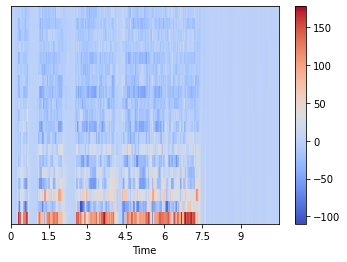

In [17]:
# try to retrieve the original example 
librosa.display.specshow(numpy_datas[200][0], sr=fs, x_axis='time')
plt.colorbar()

Separate the data list according to the label. Change file name to correct label. [1,0,0] is angry, [0,1,0] is happy, [0,0,1] is normal.

In [18]:
# change file name to correct label
angry = []
happy = []
normal = []

for i in range(len(numpy_datas)):
    file_name = numpy_datas[i][1]
    if "angry" in file_name:
        numpy_datas[i][1] = np.array([1,0,0])
        angry.append(numpy_datas[i])
    elif "happy" in file_name:
        numpy_datas[i][1] = np.array([0,1,0])
        happy.append(numpy_datas[i])
    else:
        numpy_datas[i][1] = np.array([0,0,1])
        normal.append(numpy_datas[i])

In [19]:
# check list with a certain emotion label
len(angry)

300

In [20]:
# check the shape of label
angry[0][1].shape

(3,)

Now split the Train-Valid-Test data with a ratio of 60%-20%-20%

In [21]:
# first shuffle the list of each emotion
random.shuffle(angry)
random.shuffle(happy)
random.shuffle(normal)

In [22]:
# then select the first 180 in each emotion as train data, first 60 in each emotion as valid data, and first 60 in each emotion as test data
train_data = angry[:int(len(angry)*0.6)] + happy[:int(len(happy)*0.6)] + normal[:int(len(normal)*0.6)]
valid_data = angry[int(len(angry)*0.6):int(len(angry)*(0.6+0.2))] + happy[int(len(happy)*0.6):int(len(happy)*(0.6+0.2))] + normal[int(len(normal)*0.6):int(len(normal)*(0.6+0.2))]
test_data = angry[int(len(angry)*(0.6+0.2)):] + happy[int(len(happy)*(0.6+0.2)):] + normal[int(len(normal)*(0.6+0.2)):]
random.shuffle(train_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [23]:
train_data

[[array([[0.        , 0.        , 0.        , ..., 0.        , 0.142492  ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.14220321,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.14171982,
          0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        , 0.11556196,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.11240981,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.10910416,
          0.        ]], dtype=float32),
  array([0, 1, 0])],
 [array([[ 0.0000000e+00, -1.9701449e-03,  1.2004673e+00, ...,
           2.2391076e+00,  9.3284941e-01,  0.0000000e+00],
         [ 0.0000000e+00,  1.0664976e-01,  1.4555358e+00, ...,
           2.2265518e+00,  9.2625809e-01,  0.0000000e+00],
         [ 0.0000000e+00, -1.1517089e-03,  1.1841965e+00, ...,
           2.2057076e+00,  9.1531718e-01,  0.0000000e